In [1]:
from helpers import *
import pandas as pd

# import numpy as np
# from plot_params import *
# from scipy.spatial.distance import cdist
# from copy import deepcopy
# from tqdm import tqdm
# from joblib import Parallel, delayed
# from matplotlib.animation import FuncAnimation


- different cooling schedules
- length of markov chain
- variable stepsize 
- optimal configuration for several n charges

# Figures:
- exp vs log cooling for n = 12, 30, 56, 92

- MC length of 100, 200, 400 for n = 12, 30, 56, 92 using best cooling schedule

- variable stepsize 0.5 to 0.25, 0.1, 0.05 for best MC length

In [2]:
"""
Points for in discussion
- extend to 3d
- reannealing
- other methods of solving, like genetic algorithm
- mor extensive parameter search with for example validation model
"""

'\nPoints for in discussion\n- extend to 3d\n- reannealing\n- other methods of solving, like genetic algorithm\n- mor extensive parameter search with for example validation model\n'

In [3]:
"""
TODO: 
- Different cooling schedules
- Decrease stepsize

Figures:
- Examples using both cooling schemes with n = 12, 30, 56, include the variability
- 
"""

'\nTODO: \n- Different cooling schedules\n- Decrease stepsize\n\nFigures:\n- Examples using both cooling schemes with n = 12, 30, 56, include the variability\n- \n'

In [4]:
def cooling_logistic(steps, B=7, vu=5, M=5):
    i = np.linspace(10, 1, steps)
    T = 1 / (1 + np.exp(- B * (i - M)) ** (1 / vu)) 
    return T

def cooling_exponential(steps, T_init=1, constant=0.965):
    T = np.zeros(steps)
    for i in range(steps):
        T[i] = T_init*pow(constant,i)
    return T

In [32]:
# test with exponential cooling

# simulation setings
n_attemps_per_run = 1
n_runs = 100
circle_radius = 1

# simulation parameters
n_steps = 100
stepsize_init = 0.05
stepsize_final = 0.05
random_influence = 1
force_influence = 0

n_charges_range = [12, 21, 30, 43, 56]

results_cooling_functions = {}
temp_functions = [cooling_exponential, cooling_logistic]
for temp_func in temp_functions:

    results_temp = {}         
    temperature = temp_func(n_steps)
    for i in tqdm(range(len(n_charges_range))):
        n_charges = n_charges_range[i]

        # initialize simulation
        cc = CircleCharges(
            n_charges, 
            n_attemps_per_run, 
            n_runs, 
            circle_radius, 
            n_steps, 
            stepsize_init, 
            stepsize_final, 
            random_influence, 
            force_influence, 
            temperature
        )

        # run the simulation
        cc.run_without_selection()

        # get results
        results_temp[n_charges] = cc.get_results()

    results_cooling_functions[temp_func.__name__] = results_temp

100%|██████████| 5/5 [00:14<00:00,  2.97s/it]


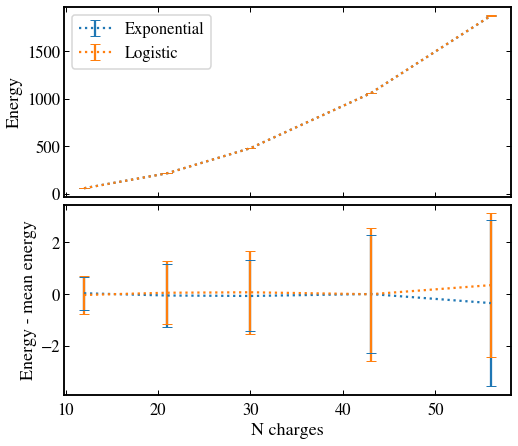

In [33]:
means = np.zeros((len(n_charges_range), 2))
stds = np.zeros((len(n_charges_range), 2))

for i, result_dict in enumerate([results_cooling_functions['cooling_exponential'], results_cooling_functions['cooling_logistic']]):
    for j, n_charges in enumerate(n_charges_range):
        means[j][i] = result_dict[n_charges]['min_energy']
        stds[j][i] = result_dict[n_charges]['std_energy']


fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].errorbar(n_charges_range, means[:, 0], stds[:, 0], capsize=5, label='Exponential', ls=':')
axs[0].errorbar(n_charges_range, means[:, 1], stds[:, 1], capsize=5, label='Logistic', ls=':')
axs[0].legend()
axs[0].set_ylabel('Energy')

axs[1].errorbar(n_charges_range, means[:, 0] - means.mean(axis=1), stds[:, 0], capsize=5, label='Exponential', ls=':')
axs[1].errorbar(n_charges_range, means[:, 1] - means.mean(axis=1), stds[:, 1], capsize=5, label='Logistic', ls=':')
axs[1].set_xlabel('N charges')
axs[1].set_ylabel('Energy - mean energy')
plt.tight_layout(pad=0)
plt.savefig('figures/test_temp_func.pdf')

In [34]:
# test different number of steps

mc_lengths = [100, 200, 400]
results_mc_length = {}

for n_steps in mc_lengths:

    temperature = cooling_exponential(n_steps)
    results_mc_test = {}
    for i in tqdm(range(len(n_charges_range))):
        n_charges = n_charges_range[i]

        # initialize simulation
        cc = CircleCharges(
            n_charges, 
            n_attemps_per_run, 
            n_runs, 
            circle_radius, 
            n_steps, 
            stepsize_init, 
            stepsize_final, 
            random_influence, 
            force_influence, 
            temperature
        )

        # run the simulation
        cc.run_without_selection()

        # get results
        results_mc_test[n_charges] = cc.get_results()
    results_mc_length[n_steps] = results_mc_test

100%|██████████| 5/5 [01:00<00:00, 12.04s/it]


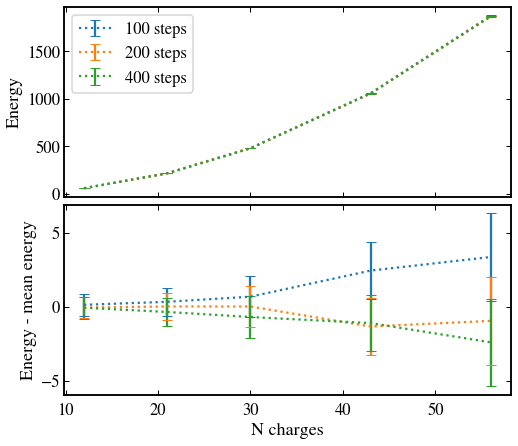

In [35]:
means = np.zeros((len(n_charges_range), 3))
stds = np.zeros((len(n_charges_range), 3))

for i, result_dict in enumerate([results_mc_length[100], results_mc_length[200], results_mc_length[400]]):
    for j, n_charges in enumerate(n_charges_range):
        means[j][i] = result_dict[n_charges]['min_energy']
        stds[j][i] = result_dict[n_charges]['std_energy']


fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].errorbar(n_charges_range, means[:, 0], stds[:, 0], capsize=5, label='100 steps', ls=':')
axs[0].errorbar(n_charges_range, means[:, 1], stds[:, 0], capsize=5, label='200 steps', ls=':')
axs[0].errorbar(n_charges_range, means[:, 2], stds[:, 0], capsize=5, label='400 steps', ls=':')
axs[0].legend()
axs[0].set_ylabel('Energy')

axs[1].errorbar(n_charges_range, means[:, 0] - means.mean(axis=1), stds[:, 0], capsize=5, label='100 steps', ls=':')
axs[1].errorbar(n_charges_range, means[:, 1] - means.mean(axis=1), stds[:, 0], capsize=5, label='200 steps', ls=':')
axs[1].errorbar(n_charges_range, means[:, 2] - means.mean(axis=1), stds[:, 0], capsize=5, label='400 steps', ls=':')
axs[1].set_xlabel('N charges')
axs[1].set_ylabel('Energy - mean energy')

plt.tight_layout(pad=0)
plt.savefig('figures/test_mc_length.pdf')
plt.show()

In [36]:
# test with stepsizes

n_steps = 400
temperature = cooling_exponential(n_steps)

final_stepsizes = [0.025, 0.01, 0.005]
results_stepsizes = {}

for final_stepsize in final_stepsizes:

    results_var_test = {}
    for i in tqdm(range(len(n_charges_range))):
        n_charges = n_charges_range[i]

        # initialize simulation
        cc = CircleCharges(
            n_charges, 
            n_attemps_per_run, 
            n_runs, 
            circle_radius, 
            n_steps, 
            stepsize_init, 
            stepsize_final, 
            random_influence, 
            force_influence, 
            temperature
        )

        # run the simulation
        cc.run_without_selection()

        # get results
        results_var_test[n_charges] = cc.get_results()

    results_stepsizes[final_stepsize] = results_var_test

100%|██████████| 5/5 [00:59<00:00, 11.84s/it]


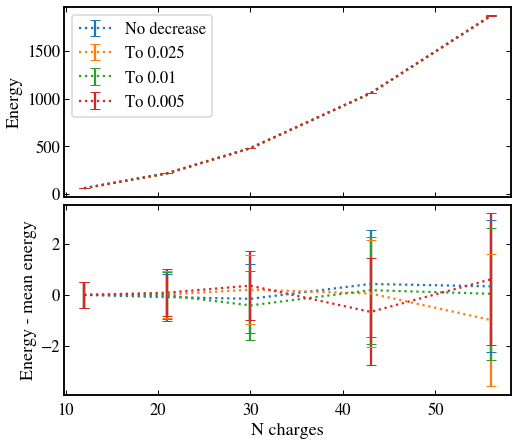

In [37]:

means = np.zeros((len(n_charges_range), 4))
stds = np.zeros((len(n_charges_range), 4))

for i, result_dict in enumerate([results_mc_length[400], results_stepsizes[0.025], results_stepsizes[0.01], results_stepsizes[0.005]]):
    for j, n_charges in enumerate(n_charges_range):
        means[j][i] = result_dict[n_charges]['min_energy']
        stds[j][i] = result_dict[n_charges]['std_energy']

fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].errorbar(n_charges_range, means[:, 0], stds[:, 0], capsize=5, label='No decrease', ls=':')
axs[0].errorbar(n_charges_range, means[:, 1], stds[:, 0], capsize=5, label='To 0.025', ls=':')
axs[0].errorbar(n_charges_range, means[:, 2], stds[:, 0], capsize=5, label='To 0.01', ls=':')
axs[0].errorbar(n_charges_range, means[:, 3], stds[:, 0], capsize=5, label='To 0.005', ls=':')
axs[0].legend()
axs[0].set_ylabel('Energy')

axs[1].errorbar(n_charges_range, means[:, 0] - means.mean(axis=1), stds[:, 0], capsize=5, label='No decrease', ls=':')
axs[1].errorbar(n_charges_range, means[:, 1] - means.mean(axis=1), stds[:, 0], capsize=5, label='To 0.025', ls=':')
axs[1].errorbar(n_charges_range, means[:, 2] - means.mean(axis=1), stds[:, 0], capsize=5, label='To 0.01', ls=':')
axs[1].errorbar(n_charges_range, means[:, 3] - means.mean(axis=1), stds[:, 0], capsize=5, label='To 0.005', ls=':')
axs[1].set_xlabel('N charges')
axs[1].set_ylabel('Energy - mean energy')

plt.tight_layout(pad=0)
plt.savefig('figures/test_decrease.pdf')
plt.show()

In [38]:
# test with force

stepsize_final = 0.01
force_influences = [0.5, 1, 2]
results_force = {}

for force_influence in force_influences:

    results_force_test = {}
    for i in tqdm(range(len(n_charges_range))):
        n_charges = n_charges_range[i]

        # initialize simulation
        cc = CircleCharges(
            n_charges, 
            n_attemps_per_run, 
            n_runs, 
            circle_radius, 
            n_steps, 
            stepsize_init, 
            stepsize_final, 
            random_influence, 
            force_influence, 
            temperature
        )

        # run the simulation
        cc.run_without_selection()

        # get results
        results_force_test[n_charges] = cc.get_results()

    results_force[force_influence] = results_force_test

100%|██████████| 5/5 [01:44<00:00, 20.98s/it]


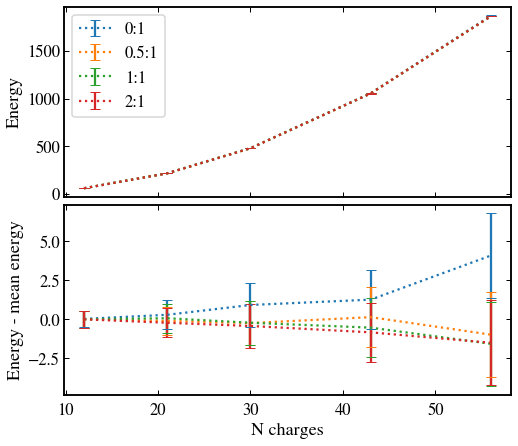

In [40]:

means = np.zeros((len(n_charges_range), 4))
stds = np.zeros((len(n_charges_range), 4))

for i, result_dict in enumerate([results_stepsizes[0.005], results_force[0.5], results_force[1], results_force[2]]):
    for j, n_charges in enumerate(n_charges_range):
        means[j][i] = result_dict[n_charges]['min_energy']
        stds[j][i] = result_dict[n_charges]['std_energy']

fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].errorbar(n_charges_range, means[:, 0], stds[:, 0], capsize=5, label='0:1', ls=':')
axs[0].errorbar(n_charges_range, means[:, 1], stds[:, 0], capsize=5, label='0.5:1', ls=':')
axs[0].errorbar(n_charges_range, means[:, 2], stds[:, 0], capsize=5, label='1:1', ls=':')
axs[0].errorbar(n_charges_range, means[:, 3], stds[:, 0], capsize=5, label='2:1', ls=':')
axs[0].legend()
axs[0].set_ylabel('Energy')

axs[1].errorbar(n_charges_range, means[:, 0] - means.mean(axis=1), stds[:, 0], capsize=5, label='0:1', ls=':')
axs[1].errorbar(n_charges_range, means[:, 1] - means.mean(axis=1), stds[:, 0], capsize=5, label='0.5:1', ls=':')
axs[1].errorbar(n_charges_range, means[:, 2] - means.mean(axis=1), stds[:, 0], capsize=5, label='1:1', ls=':')
axs[1].errorbar(n_charges_range, means[:, 3] - means.mean(axis=1), stds[:, 0], capsize=5, label='2:1', ls=':')
axs[1].set_xlabel('N charges')
axs[1].set_ylabel('Energy - mean energy')

plt.tight_layout(pad=0)
plt.savefig('figures/test_force.pdf')
plt.show()

simulation: 100%|██████████| 1/1 [01:17<00:00, 77.78s/it]


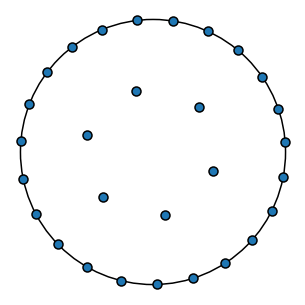

In [97]:

# # simulation setings
# n_attemps_per_run = 100
# n_runs = 1
# circle_radius = 1

# # simulation parameters
# n_steps = 400

# stepsize_init = 0.05
# stepsize_final = 0.005
# random_influence = 1
# force_influence = 1

# # parameters for exponential cooling function
# T_init = 1
# constant = 0.965
# temperature = cooling_exponential(n_steps, T_init, constant)

# # n_charges_range = [55]
# n_charges_range = [11, 12, 29, 30, 55, 56, 91, 92]


# for n_charges in n_charges_range:


#     cc = CircleCharges(
#         n_charges, 
#         n_attemps_per_run, 
#         n_runs, 
#         circle_radius, 
#         n_steps, 
#         stepsize_init, 
#         stepsize_final, 
#         random_influence, 
#         force_influence, 
#         temperature
#     )
#     cc.run()

#     pos = cc.choose_best_run(cc.best_runs)[0]

#     plt.figure(figsize=(6, 6))
#     plt.box(False)
#     plt.scatter(pos[:, 0], pos[:, 1], edgecolors='k', zorder=1)
#     circle = plt.Circle((0, 0), 1, fill=False, zorder=-1)
#     plt.gca().add_patch(circle)
#     plt.xticks([])
#     plt.yticks([])
#     plt.tight_layout()
#     plt.savefig(f'figures/magic_numbers_{n_charges}.pdf')
#     plt.show()

In [98]:
# n_charges = 56
# rs = RunSimulation(
#     n_charges,
#     circle_radius,
#     n_steps, 
#     stepsize_init,
#     stepsize_final,
#     random_influence, 
#     force_influence,
#     temperature
# )
# final_pos = rs.run()


# frames = 400
# sec = 15
# pos_animate = rs.pos_history[::n_steps//frames]
# fig, ax = plt.subplots(figsize=(7, 7))
# plt.box(False)
# plot = ax.scatter(pos_animate[0, :, 0], pos_animate[0, :, 1], edgecolors='k', zorder=1)
# text = ax.text(0.7, 0.9, '', fontsize=10)
# circle = plt.Circle((0, 0), 1, fill=False, zorder=-1)
# plt.gca().add_patch(circle)
# plt.xticks([])
# plt.yticks([])
# ax.set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

# def anim_func(i):
#     plot.set_offsets(pos_animate[i])
#     text.set_text(f'{i}/{frames - 1}')
#     return plot

# animation = FuncAnimation(
#     fig, 
#     anim_func, 
#     frames=frames, 
#     interval=sec / frames * 1e3, 
#     save_count=frames
# )
# animation.save(f'56movie.mp4', dpi=500)